<a href="https://colab.research.google.com/github/haeniKim/metaverse-academy/blob/master/ML/230628_pytorch_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch

In [ ]:
x = torch.randn(100,1)
x = x * 10
x.size()

torch.Size([100, 1])

In [ ]:
y = x + torch.randn(100,1)
y.size()

torch.Size([100, 1])

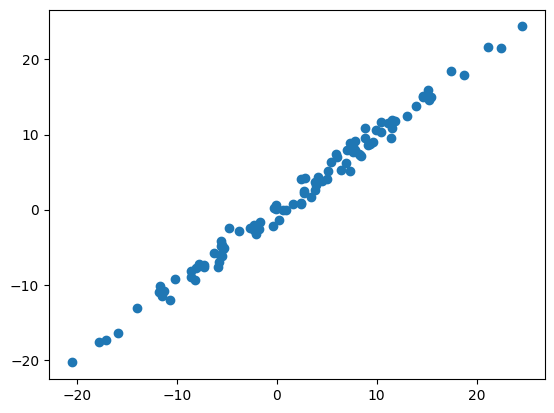

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [ ]:
import torch.nn as nn

class LRModel(nn.Module):
    def __init__(self):
        super(LRModel,self).__init__()
        self.layer  = nn.Linear(1,1)

    def forward(self,x):
        x = self.layer(x)
        return x


model = LRModel()
model

LRModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
w,b = model.parameters()

In [ ]:
print(w)
print(b)

Parameter containing:
tensor([[-0.3683]], requires_grad=True)
Parameter containing:
tensor([0.5317], requires_grad=True)


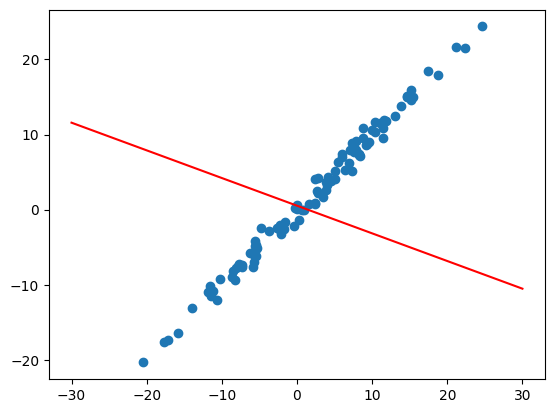

In [ ]:
import numpy as np

w1 = w[0][0].item()
b1 = b[0].item()

x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.scatter(x,y)
plt.plot(x1,y1,'r')
plt.show()

1  loss:<built-in method item of Tensor object at 0x7f1233fc3510>
2  loss:<built-in method item of Tensor object at 0x7f1233e454e0>
3  loss:<built-in method item of Tensor object at 0x7f1233ec2b10>
4  loss:<built-in method item of Tensor object at 0x7f123252a2f0>
5  loss:<built-in method item of Tensor object at 0x7f123256de90>
6  loss:<built-in method item of Tensor object at 0x7f1233e54ea0>
7  loss:<built-in method item of Tensor object at 0x7f1232554590>
8  loss:<built-in method item of Tensor object at 0x7f12325c22f0>
9  loss:<built-in method item of Tensor object at 0x7f123244a890>
10  loss:<built-in method item of Tensor object at 0x7f12324a53a0>
11  loss:<built-in method item of Tensor object at 0x7f12324a54e0>
12  loss:<built-in method item of Tensor object at 0x7f1233e98b80>
13  loss:<built-in method item of Tensor object at 0x7f123244a2f0>
14  loss:<built-in method item of Tensor object at 0x7f1233fc0f90>
15  loss:<built-in method item of Tensor object at 0x7f12323d97b0>
16  

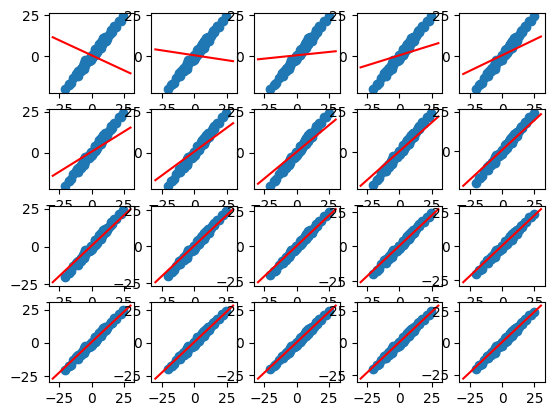

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)
epochs = 20

cri_list = []

for epoch in range(epochs):
    optimizer.zero_grad()

    pred = model(x)
    loss = criterion(pred,y)
    cri_list.append(loss.item())
    drawplot(epoch)
    loss.backward()
    print(f'{epoch+1}  loss:{loss.item}')
    optimizer.step()

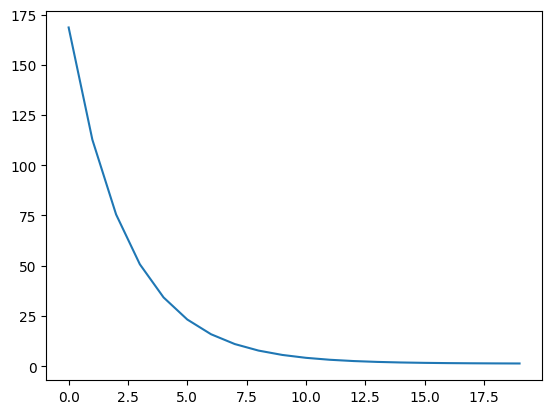

In [ ]:
plt.plot(range(epochs),cri_list)
plt.show()

In [ ]:
def drawplot(epoch):
    plt.subplot(4,5,epoch+1)
    w,b = model.parameters()

    w1 = w[0][0].item()
    b1 = b[0].item()

    x1 = np.array([-30,30])
    y1 = w1 * x1 + b1

    plt.scatter(x,y)
    plt.plot(x1,y1,'r')